In [135]:
from ML_Preparation.Preprocessing_M import DataExtractor
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from calplot import calplot
from sklearn.preprocessing import MinMaxScaler

In [136]:
de = DataExtractor(r"C:\Users\Leonard\OneDrive\Dokumente\5_Semester\IoT\iot_co2_ampel_m\raw_data", r"C:\Users\Leonard\OneDrive\Dokumente\5_Semester\IoT\iot_co2_ampel_m\extracted_data")
df = de.create_df()

Read data successfully.
Data contains 979166 data points and 18 columns.


### Overview

In [137]:
df.head(10)

,date_time,device_id,tmp,hum,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi,snr,gateway,channel_index,spreading_factor,bandwidth,f_cnt
0,2022-06-01 11:21:03,hka-aqm-m001,24.62,31.81,770,450,155,71,7,4,-99,-99,7.2,drag-lps8-02,7,7,125000,2
1,2022-06-01 11:21:20,hka-aqm-m001,24.46,31.71,688,450,183,86,3,4,-101,-101,7.0,drag-lps8-02,5,7,125000,3
2,2022-06-01 11:21:40,hka-aqm-m001,24.60,31.84,627,450,184,86,3,7,-97,-97,5.0,drag-lps8-02,3,7,125000,4
3,2022-06-01 11:22:01,hka-aqm-m001,24.52,31.71,585,450,180,84,4,10,-100,-100,6.5,drag-lps8-02,1,7,125000,5
4,2022-06-01 11:23:01,hka-aqm-m001,25.14,31.84,559,450,178,83,5,10,-102,-102,3.5,drag-lps8-02,6,7,125000,6
5,2022-06-01 11:24:07,hka-aqm-m001,25.18,33.39,595,450,178,82,4,6,-108,-108,5.2,drag-lps8-02,0,7,125000,7
6,2022-06-01 11:25:13,hka-aqm-m001,25.52,31.98,610,450,180,84,5,5,-103,-103,4.8,drag-lps8-02,2,7,125000,8
7,2022-06-01 11:26:22,hka-aqm-m001,25.93,30.16,560,450,188,87,5,9,-109,-109,5.2,drag-outd-01,4,7,125000,9
8,2022-06-01 11:27:20,hka-aqm-m001,25.29,33.86,540,450,191,88,5,9,-109,-109,7.0,drag-outd-01,3,7,125000,10
9,2022-06-01 11:28:00,hka-aqm-m001,24.90,31.88,529,450,196,91,8,7,-97,-97,6.0,drag-lps8-02,5,7,125000,11


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979166 entries, 0 to 979165
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date_time         979166 non-null  object 
 1   device_id         979166 non-null  object 
 2   tmp               979166 non-null  float64
 3   hum               979166 non-null  float64
 4   CO2               979166 non-null  int64  
 5   VOC               979166 non-null  int64  
 6   vis               979166 non-null  int64  
 7   IR                979166 non-null  int64  
 8   WIFI              979166 non-null  int64  
 9   BLE               979166 non-null  int64  
 10  rssi              979166 non-null  int64  
 11  channel_rssi      979166 non-null  int64  
 12  snr               979166 non-null  object 
 13  gateway           979166 non-null  object 
 14  channel_index     979166 non-null  int64  
 15  spreading_factor  979166 non-null  int64  
 16  bandwidth         97

In [139]:
df.describe()

,tmp,hum,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi,channel_index,spreading_factor,bandwidth,f_cnt
count,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.00000,979166.000000,979166.0,979166.000000
mean,23.062647,42.268031,834.725917,1077.467033,320.240057,92.920465,2.707651,4.667678,-108.117919,-108.117919,3.49297,7.991810,125000.0,9549.678156
std,3.500564,9.507149,3695.416280,1343.530722,903.685401,265.913650,9.883240,13.713992,22.136894,22.136894,2.29838,1.314035,0.0,9564.381335
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-144.000000,-144.000000,0.00000,7.000000,125000.0,1.000000
25%,21.080000,36.190000,436.000000,646.000000,6.000000,1.000000,1.000000,0.000000,-123.000000,-123.000000,1.00000,7.000000,125000.0,1536.000000
50%,22.860000,41.720000,484.000000,903.000000,31.000000,8.000000,2.000000,0.000000,-115.000000,-115.000000,4.00000,8.000000,125000.0,6001.000000
75%,25.150000,47.660000,592.000000,1248.000000,338.000000,105.000000,4.000000,4.000000,-103.000000,-103.000000,5.00000,8.000000,125000.0,15757.000000
max,614.450000,647.770000,65530.000000,29522.000000,46095.000000,59138.000000,255.000000,255.000000,118.000000,118.000000,7.00000,12.000000,125000.0,46697.000000


### Preprocessing

In [140]:
df.loc[:, "room_number"] = df["device_id"].str.split("-").str[-1]
df.loc[:, "building_name"] = df["room_number"].str.replace('\d+', '', regex = True)
df_m = df[df.building_name == "m"]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Leonard\AppData\Local\Temp\ipykernel_5968\1366217261.py:2: SyntaxWarning: invalid escape sequence '\d'
  df.loc[:, "building_name"] = df["room_number"].str.replace('\d+', '', regex = True)


In [141]:
df["date_time"] = pd.to_datetime(df["date_time"])
df["snr"] = df["snr"].astype(float)
df = df.dropna()
df = df.drop_duplicates()

In [142]:
features = ['date_time', 'tmp', 'hum', 'CO2', 'VOC', 'vis', 'IR']

In [143]:
def remove_outliers(df, col, fill = 'None'):
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr

    if fill.lower() == 'none':
        df_filtered = df.loc[(df[col] >= lower_whisker) & (df[col] <= upper_whisker)]
        return df_filtered

    elif fill.lower() == 'max':
        fill_val = df.loc[(df[col] >= lower_whisker) & (df[col] <= upper_whisker)][col].max()
    
    elif fill.lower() == 'min':
        fill_val = df.loc[(df[col] >= lower_whisker) & (df[col] <= upper_whisker)][col].min()

    elif fill.lower() == 'mean':
        fill_val = df.loc[(df[col] >= lower_whisker) & (df[col] <= upper_whisker)][col].mean()

    else:
        valid_fill_options = ['None', 'max', 'min', 'mean']
        raise ValueError(f"Invalid value for 'fill'. Possible options are: {', '.join(valid_fill_options)}")

    df_filtered = df.copy()
    df_filtered[col] = df_filtered[col].apply(lambda x: fill_val if (x < lower_whisker or x > upper_whisker) else x)

    return df_filtered

In [144]:
def count_outliers(df, col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr

    num_outliers = len(df.loc[(df[col] > upper_whisker) | (df[col] < lower_whisker)])

    return num_outliers

In [145]:
def scale(df, col, scaler=MinMaxScaler()):

    df_scaled = df.copy()
    df_scaled[col] = scaler.fit_transform(df_scaled[[col]])

    return df_scaled

In [146]:
def resample(df, datetime_col, resample_col, freq, weekday=False, only_freq=False):
    df_resampled = df[[datetime_col, resample_col]]

    if only_freq:
        if freq.lower() == 'h':
            df_resampled[datetime_col] = df_resampled[datetime_col].dt.hour
        elif freq.lower() == 'd':
            if weekday:
                df_resampled[datetime_col] = df_resampled[datetime_col].dt.weekday
            else:
                df_resampled[datetime_col] = df_resampled[datetime_col].dt.day
        df_resampled = df_resampled.groupby(datetime_col).mean().reset_index()
    
    else:
        df_resampled = df_resampled.set_index(datetime_col).resample(freq).mean().reset_index()
    
    return df_resampled

In [147]:
def missing_dates(df, date_col = "date_time", freq = "d"):

    df_missing_dates = df[[date_col]].copy()
    df_missing_dates[date_col] = df_missing_dates[date_col].dt.floor(freq)
    df_missing_dates = df_missing_dates.drop_duplicates(date_col)
    df_missing_dates["missing"] = False
    df_missing_dates = df_missing_dates.set_index(date_col)

    all_dates = pd.date_range(df_missing_dates.index.min(), df_missing_dates.index.max(), freq=freq)
    df_missing_dates = df_missing_dates.reindex(all_dates)
    
    df_missing_dates = df_missing_dates.fillna(True)
    missing_dates = df_missing_dates.loc[df_missing_dates["missing"] == True].index
    
    return all_dates, missing_dates

### Missing Data

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1000x340 with 2 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


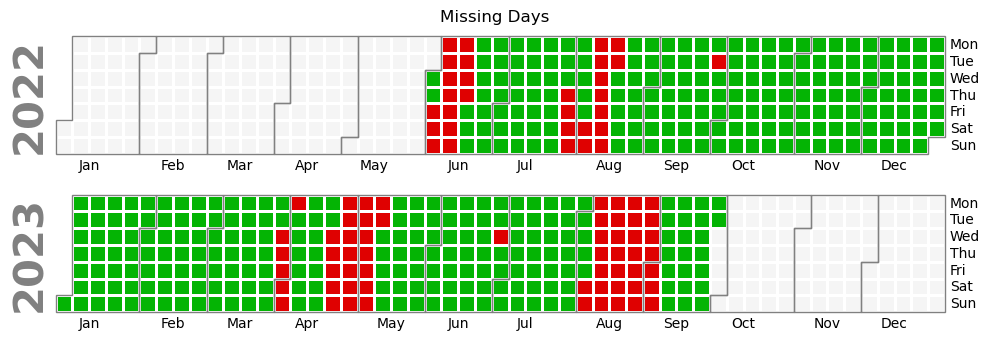

In [148]:
daily_counts = df.date_time.dt.floor('D').value_counts().sort_index()
all_dates = pd.date_range(daily_counts.index.min(), daily_counts.index.max(), freq = 'D')

daily_counts = daily_counts.reindex(all_dates, fill_value = 0)
daily_presence = daily_counts.map(lambda x: 1 if x > 0 else 0)

cmap = mcolors.LinearSegmentedColormap.from_list('custom', ['#DF0101', '#04B404'])
calplot(daily_presence, cmap=cmap, colorbar = False, suptitle = "Missing Days")

C:\Users\Leonard\AppData\Local\Temp\ipykernel_5968\3643659077.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_missing_dates = df_missing_dates.fillna(True)


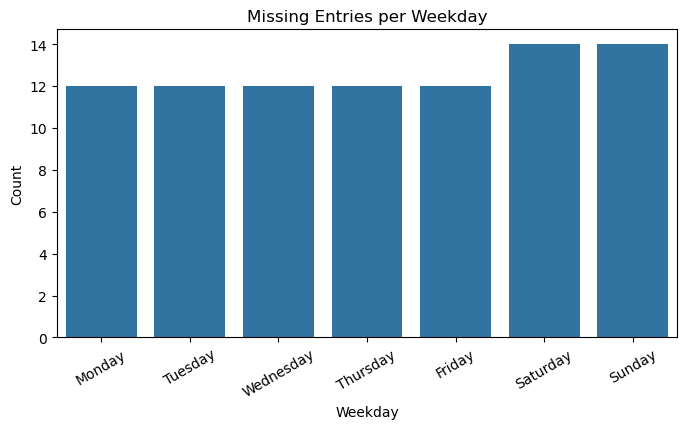

In [149]:
all_days, missing_days = missing_dates(df, "date_time", "d")

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sum_per_weekday = {k:0 for k in weekdays}
for day in missing_days:
    sum_per_weekday[weekdays[day.weekday()]] += 1

plt.figure(figsize=(8, 4))
sns.barplot(sum_per_weekday)
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.title("Missing Entries per Weekday")
plt.xticks(rotation=30)
plt.show()

### Data Frequency

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x340 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


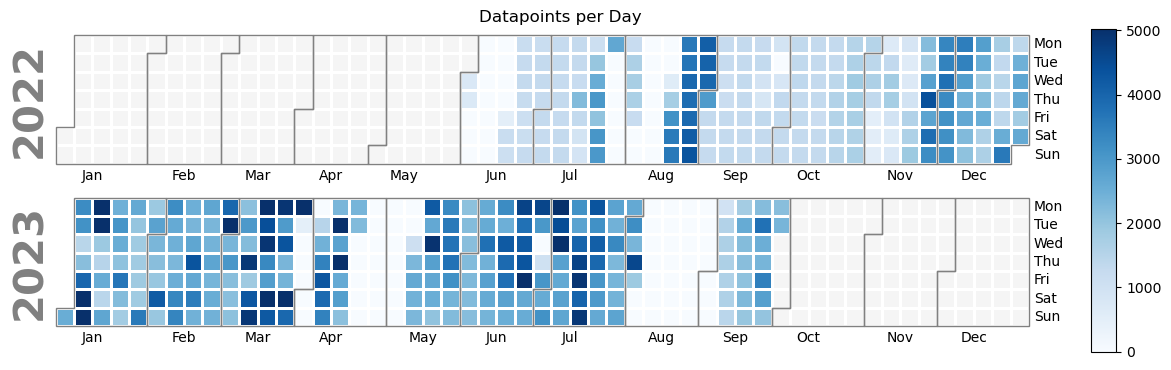

In [150]:
daily_counts = remove_outliers(daily_counts.to_frame(name = "num_datapoints"), 'num_datapoints', fill = 'max')
daily_counts = daily_counts.num_datapoints

calplot(daily_counts, cmap = 'Blues', suptitle = "Datapoints per Day")

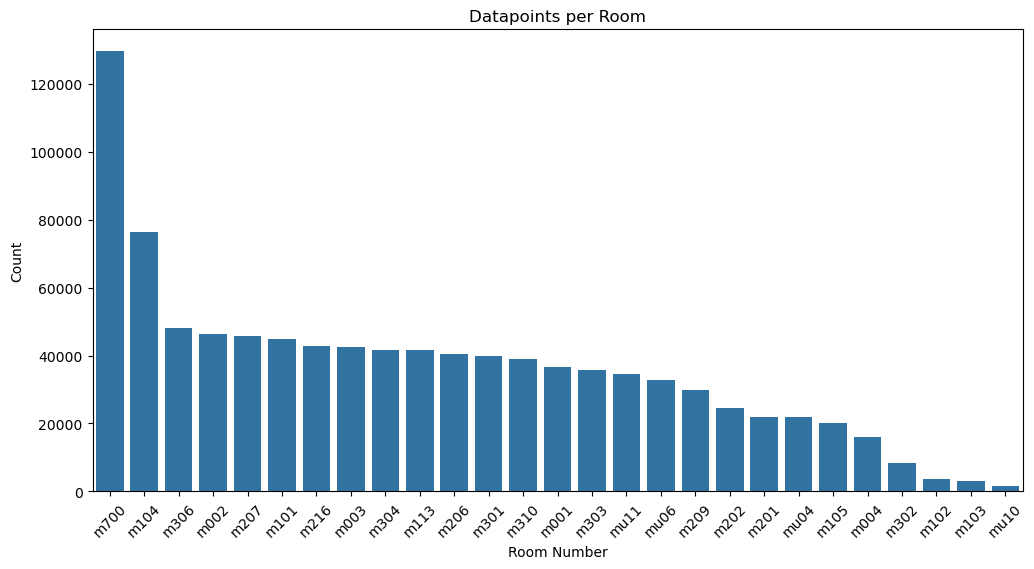

In [151]:
df_resampled_rooms = df.room_number.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(df_resampled_rooms)
plt.ylabel("Count")
plt.xlabel("Room Number")
plt.xticks(rotation=45)
plt.title("Datapoints per Room")
plt.show()

### Outliers

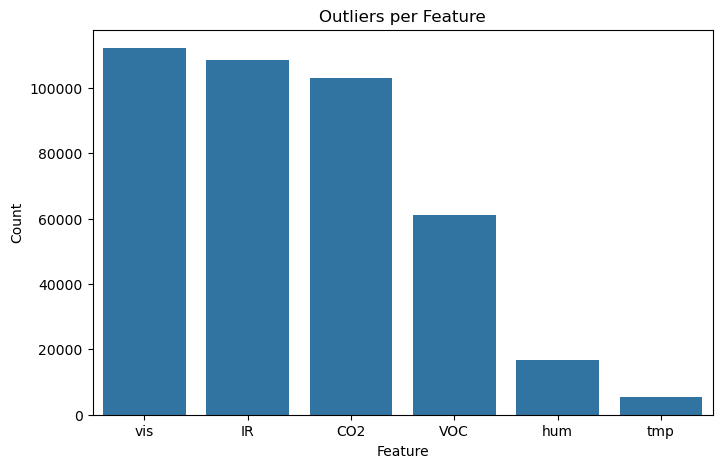

In [152]:
num_outliers = {
    'tmp': None, 'hum': None,
    'CO2': None, 'VOC': None,
    'vis': None, 'IR': None
    }

for col in features[1:]:
    num_outliers[col] = count_outliers(df, col)

num_outliers = {k: v for k, v in sorted(num_outliers.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(8,5))
sns.barplot(num_outliers)
plt.title("Outliers per Feature")
plt.xlabel("Feature")
plt.ylabel("Count")
plt.show()

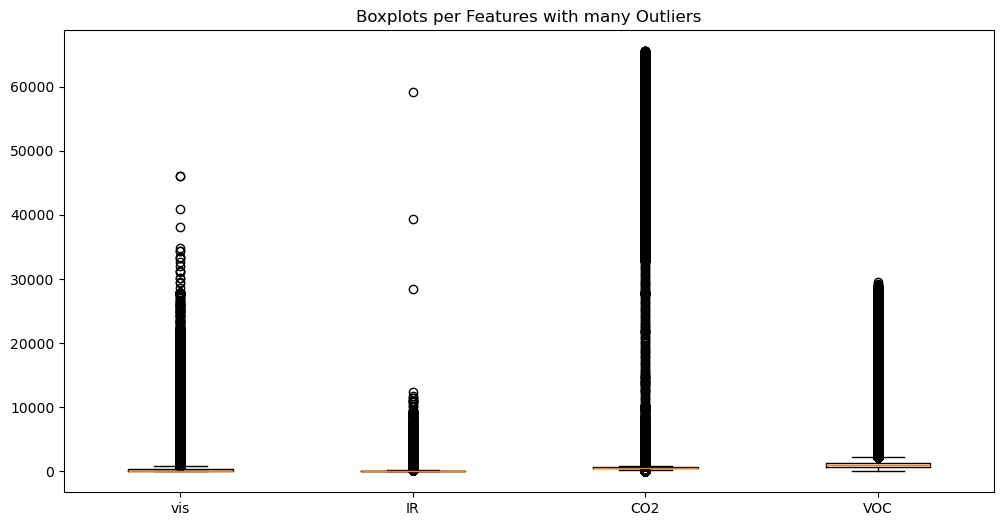

In [153]:
plt.figure(figsize=(12, 6))
plt.boxplot([df["vis"], df["IR"], df['CO2'], df['VOC']])
plt.xticks([1,2,3,4], ["vis", "IR", "CO2", "VOC"],)
plt.title("Boxplots per Features with many Outliers")
plt.show()

### Features

#### Distribution

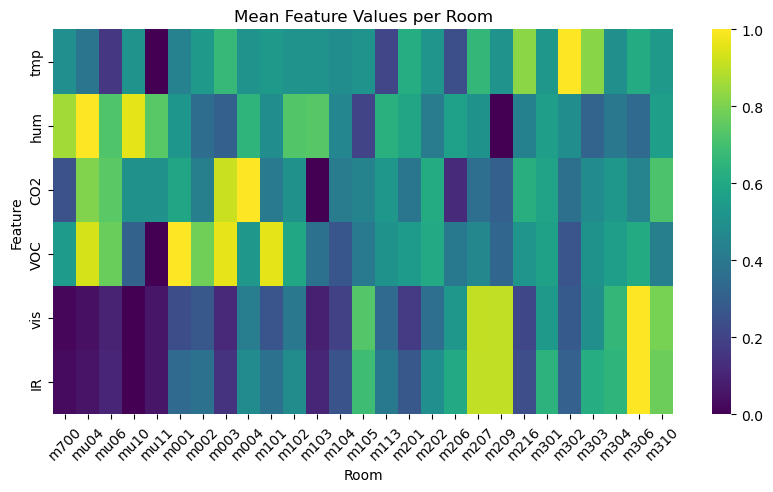

In [154]:
df_resampled_rooms = df.groupby('room_number')[features[1:]].mean().reset_index()
for feature in features[1:]:
    df_resampled_rooms = remove_outliers(df_resampled_rooms, feature, fill='mean')
    df_resampled_rooms = scale(df_resampled_rooms, feature)

df_resampled_rooms = pd.concat([df_resampled_rooms.tail(5), df_resampled_rooms.head(len(df_resampled_rooms)-5)])

plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_resampled_rooms.set_index("room_number").T, cmap="viridis")
heatmap.set_title("Mean Feature Values per Room")
heatmap.set_xlabel("Room")
heatmap.set_ylabel("Feature")
plt.xticks(rotation=45)
plt.show()

#### Correlations

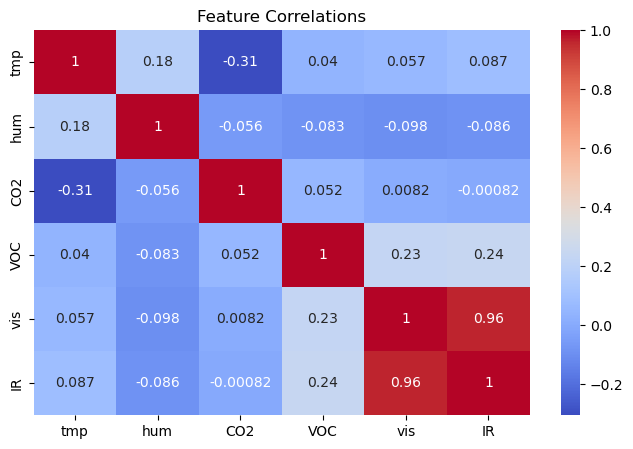

In [155]:
df_cleaned = df[features]

for feature in features[1:]:
    df_cleaned = remove_outliers(df_cleaned, feature)
    df_cleaned = scale(df_cleaned, feature)

plt.figure(figsize=(8,5))
sns.heatmap(df_cleaned.drop('date_time', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

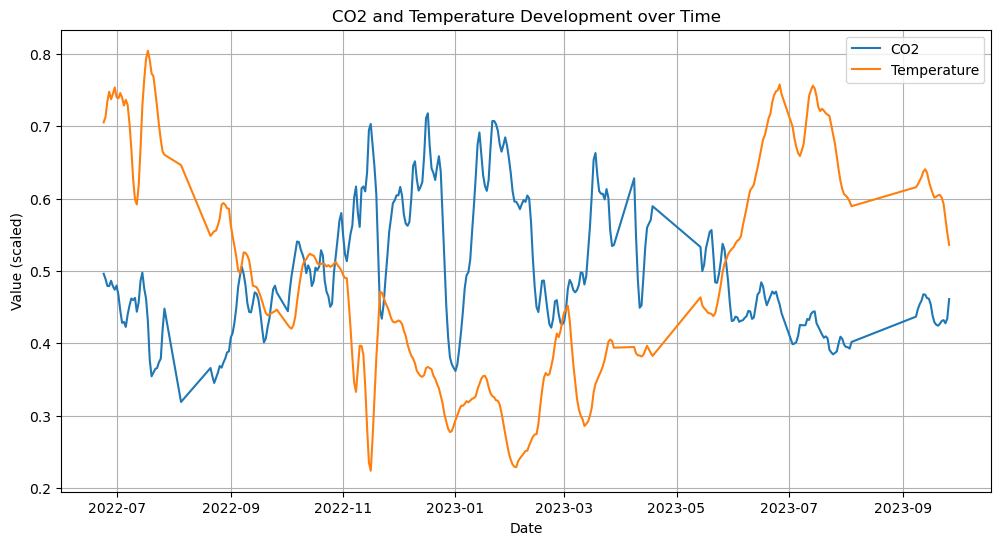

In [156]:
window_size = 5

df_cleaned_CO2 = resample(df_cleaned, 'date_time', 'CO2', 'D')
CO2_rolling = df_cleaned_CO2['CO2'].rolling(window=window_size).mean()

df_cleaned_tmp = resample(df_cleaned, 'date_time', 'tmp', 'D')
tmp_rolling = df_cleaned_tmp['tmp'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned_CO2["date_time"], y=CO2_rolling, label="CO2")
sns.lineplot(x=df_cleaned_tmp["date_time"], y=tmp_rolling, label="Temperature")
plt.xlabel("Date")
plt.ylabel("Value (scaled)")
plt.title("CO2 and Temperature Development over Time")
plt.grid(True)

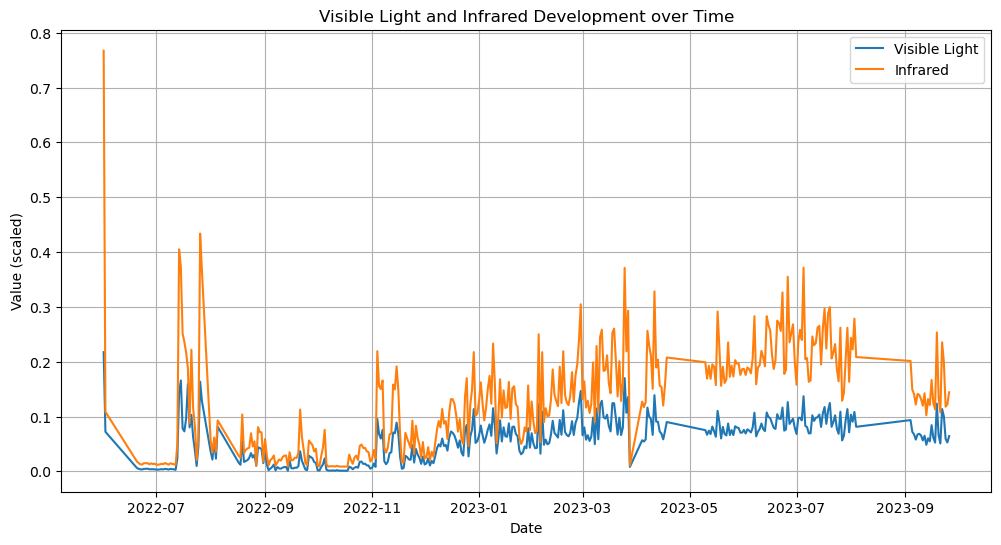

In [157]:
df_cleaned_vis = resample(df_cleaned, 'date_time', 'vis', 'D')
df_cleaned_IR = resample(df_cleaned, 'date_time', 'IR', 'D')

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned_vis["date_time"], y=df_cleaned_vis["vis"], label="Visible Light")
sns.lineplot(x=df_cleaned_IR["date_time"], y=df_cleaned_IR["IR"], label="Infrared")
plt.xlabel("Date")
plt.ylabel("Value (scaled)")
plt.title("Visible Light and Infrared Development over Time")
plt.grid(True)

#### Development over time

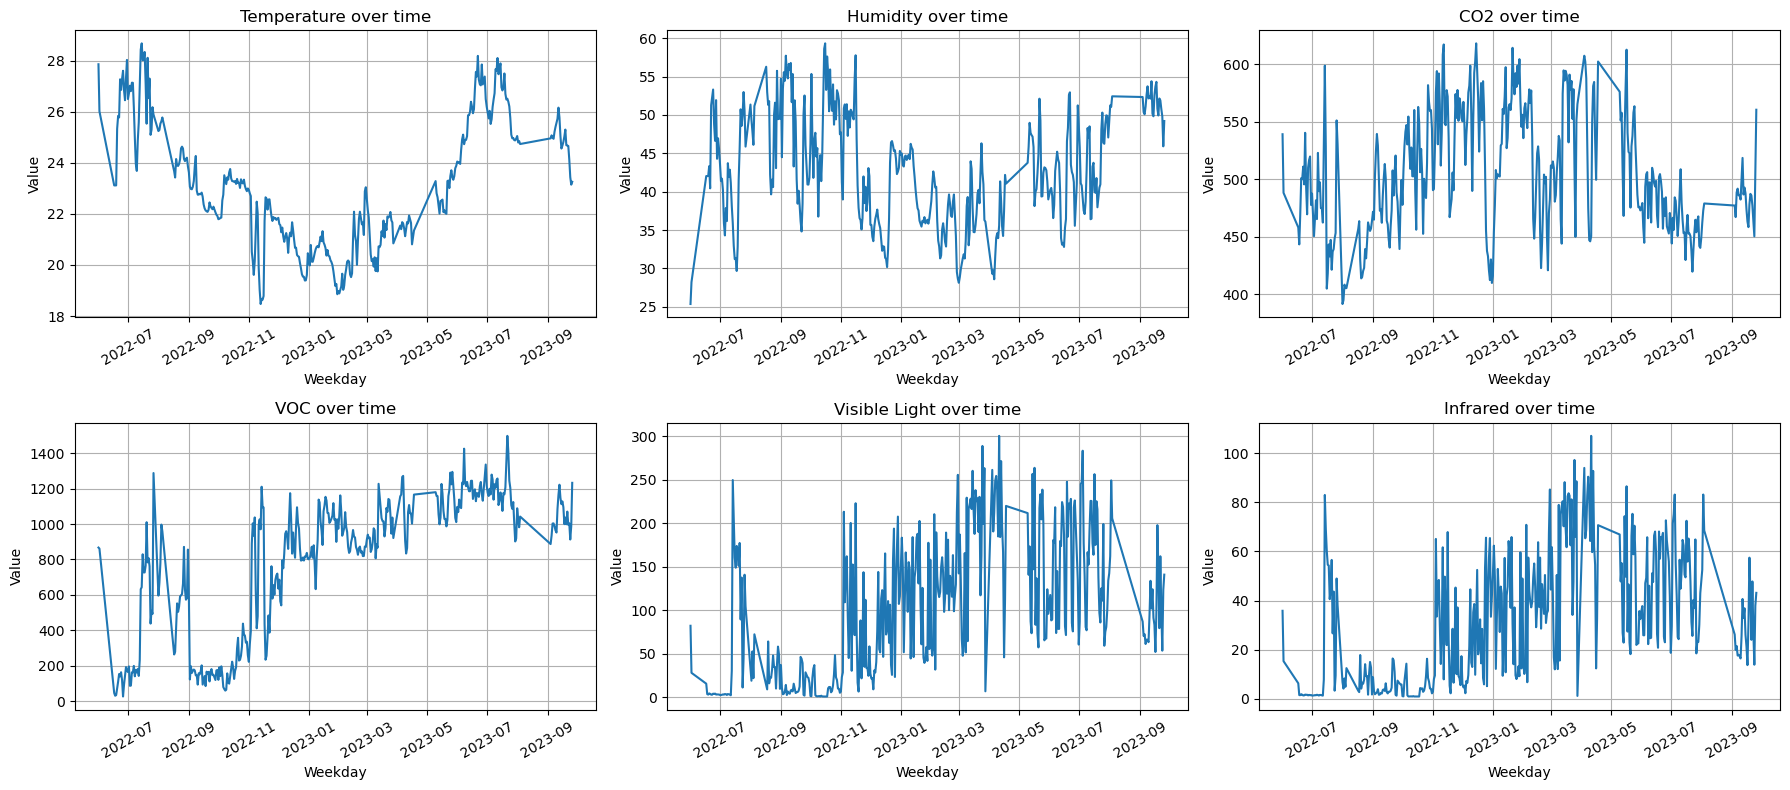

In [158]:
df_cleaned = df[features]
for feature in features[1:]:
    df_cleaned = remove_outliers(df_cleaned, feature, fill='mean')

df_resampled_day = pd.concat([resample(df_cleaned, 'date_time', feature, 'd').set_index('date_time') for feature in features[1:]], axis=1)

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

sns.lineplot(data=df_resampled_day, x=df_resampled_day.index, y='tmp', ax=axs[0, 0])
axs[0, 0].set_title('Temperature over time')
axs[0, 0].set_xlabel('Weekday')
axs[0, 0].set_ylabel('Value')
axs[0, 0].grid(True)

sns.lineplot(data=df_resampled_day, x=df_resampled_day.index, y='hum', ax=axs[0, 1])
axs[0, 1].set_title('Humidity over time')
axs[0, 1].set_xlabel('Weekday')
axs[0, 1].set_ylabel('Value')
axs[0, 1].grid(True)

sns.lineplot(data=df_resampled_day, x=df_resampled_day.index, y='CO2', ax=axs[0, 2])
axs[0, 2].set_title('CO2 over time')
axs[0, 2].set_xlabel('Weekday')
axs[0, 2].set_ylabel('Value')
axs[0, 2].grid(True)

sns.lineplot(data=df_resampled_day, x=df_resampled_day.index, y='VOC', ax=axs[1, 0])
axs[1, 0].set_title('VOC over time')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].set_ylabel('Value')
axs[1, 0].grid(True)

sns.lineplot(data=df_resampled_day, x=df_resampled_day.index, y='vis', ax=axs[1, 1])
axs[1, 1].set_title('Visible Light over time')
axs[1, 1].set_xlabel('Weekday')
axs[1, 1].set_ylabel('Value')
axs[1, 1].grid(True)

sns.lineplot(data=df_resampled_day, x=df_resampled_day.index, y='IR', ax=axs[1, 2])
axs[1, 2].set_title('Infrared over time')
axs[1, 2].set_xlabel('Weekday')
axs[1, 2].set_ylabel('Value')
axs[1, 2].grid(True)

for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)

plt.tight_layout()
plt.show()

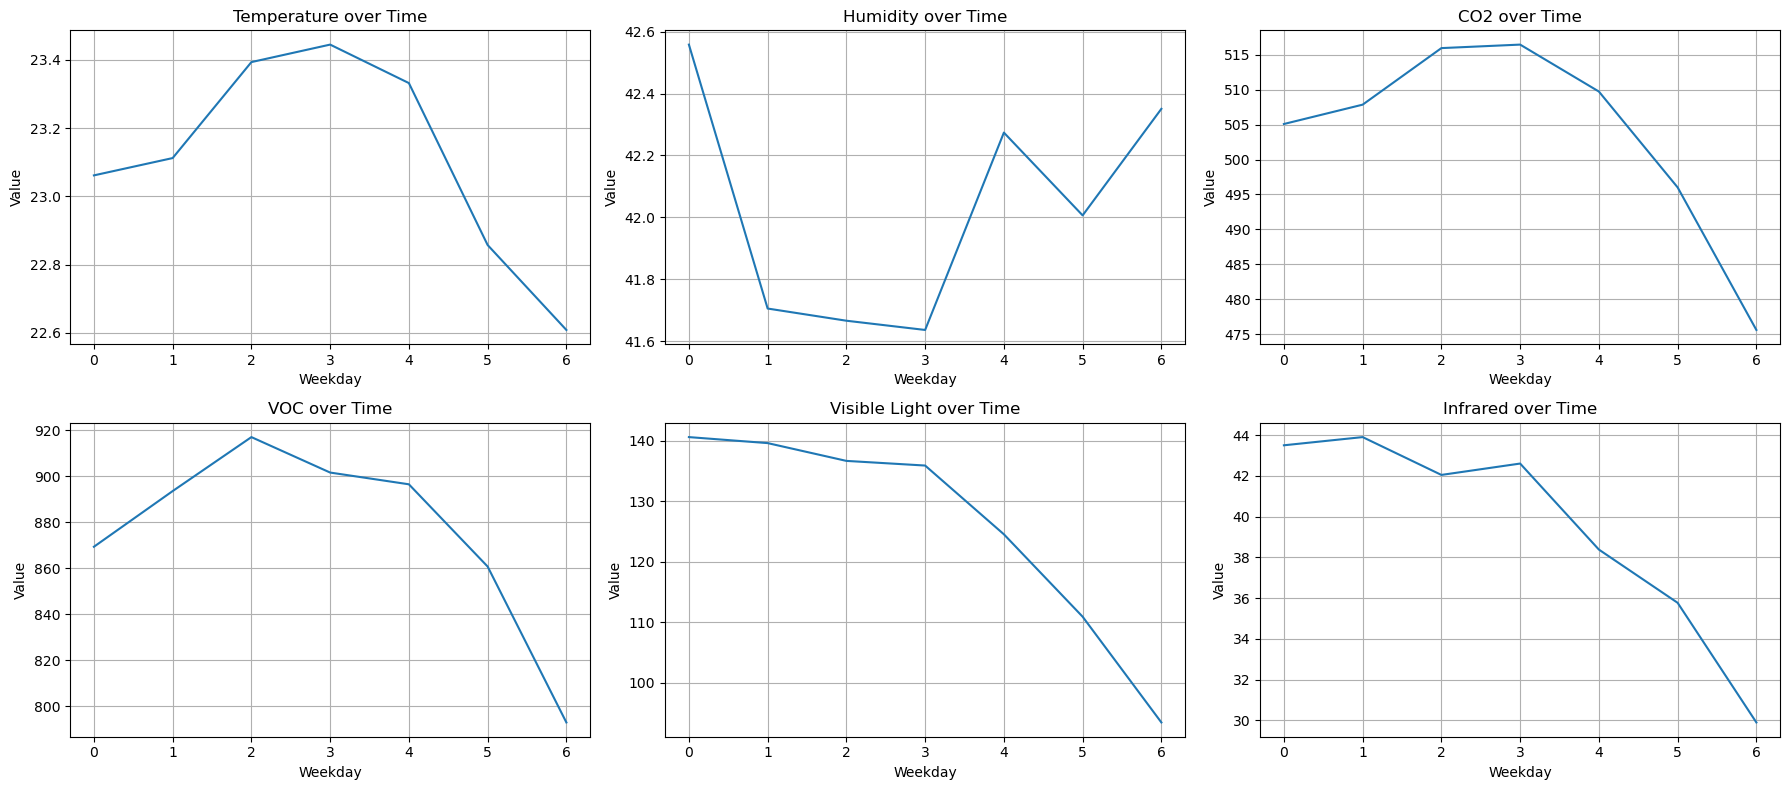

In [159]:
df_resampled_weekday = pd.concat([resample(df_cleaned, 'date_time', feature, 'd', weekday=True, only_freq=True).set_index('date_time') for feature in features[1:]], axis=1)

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

sns.lineplot(data=df_resampled_weekday, x=df_resampled_weekday.index, y='tmp', ax=axs[0, 0])
axs[0, 0].set_title('Temperature over Time')
axs[0, 0].set_xlabel('Weekday')
axs[0, 0].set_ylabel('Value')
axs[0, 0].grid(True)

sns.lineplot(data=df_resampled_weekday, x=df_resampled_weekday.index, y='hum', ax=axs[0, 1])
axs[0, 1].set_title('Humidity over Time')
axs[0, 1].set_xlabel('Weekday')
axs[0, 1].set_ylabel('Value')
axs[0, 1].grid(True)

sns.lineplot(data=df_resampled_weekday, x=df_resampled_weekday.index, y='CO2', ax=axs[0, 2])
axs[0, 2].set_title('CO2 over Time')
axs[0, 2].set_xlabel('Weekday')
axs[0, 2].set_ylabel('Value')
axs[0, 2].grid(True)

sns.lineplot(data=df_resampled_weekday, x=df_resampled_weekday.index, y='VOC', ax=axs[1, 0])
axs[1, 0].set_title('VOC over Time')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].set_ylabel('Value')
axs[1, 0].grid(True)

sns.lineplot(data=df_resampled_weekday, x=df_resampled_weekday.index, y='vis', ax=axs[1, 1])
axs[1, 1].set_title('Visible Light over Time')
axs[1, 1].set_xlabel('Weekday')
axs[1, 1].set_ylabel('Value')
axs[1, 1].grid(True)

sns.lineplot(data=df_resampled_weekday, x=df_resampled_weekday.index, y='IR', ax=axs[1, 2])
axs[1, 2].set_title('Infrared over Time')
axs[1, 2].set_xlabel('Weekday')
axs[1, 2].set_ylabel('Value')
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

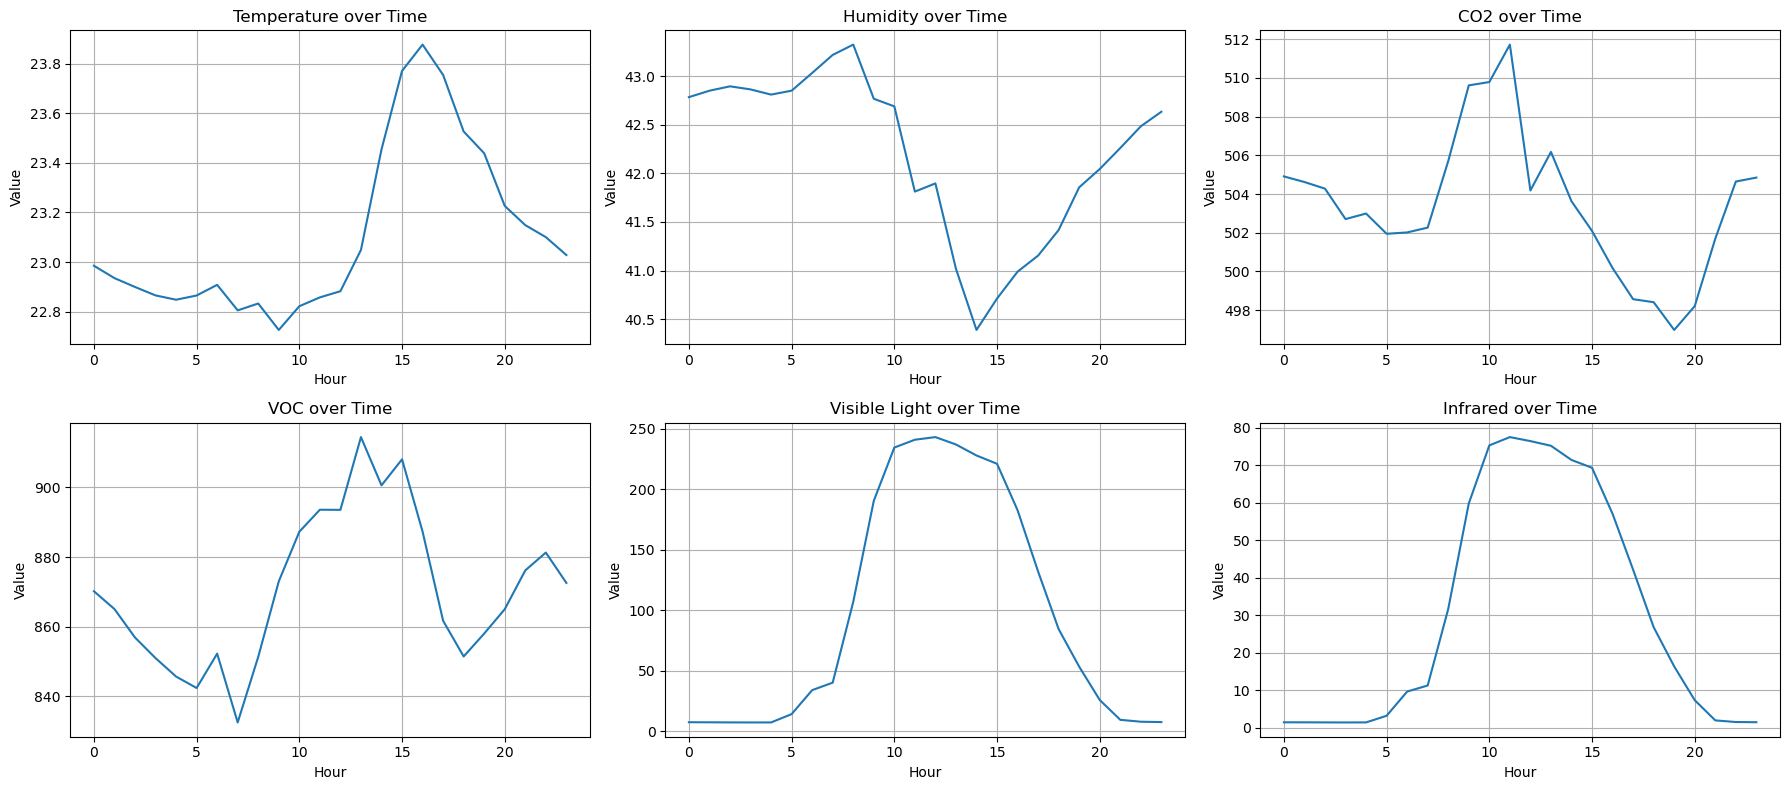

In [160]:
df_resampled_hour = pd.concat([resample(df_cleaned, 'date_time', feature, 'h', only_freq=True).set_index('date_time') for feature in features[1:]], axis=1)

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

sns.lineplot(data=df_resampled_hour, x=df_resampled_hour.index, y='tmp', ax=axs[0, 0])
axs[0, 0].set_title('Temperature over Time')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Value')
axs[0, 0].grid(True)

sns.lineplot(data=df_resampled_hour, x=df_resampled_hour.index, y='hum', ax=axs[0, 1])
axs[0, 1].set_title('Humidity over Time')
axs[0, 1].set_xlabel('Hour')
axs[0, 1].set_ylabel('Value')
axs[0, 1].grid(True)

sns.lineplot(data=df_resampled_hour, x=df_resampled_hour.index, y='CO2', ax=axs[0, 2])
axs[0, 2].set_title('CO2 over Time')
axs[0, 2].set_xlabel('Hour')
axs[0, 2].set_ylabel('Value')
axs[0, 2].grid(True)

sns.lineplot(data=df_resampled_hour, x=df_resampled_hour.index, y='VOC', ax=axs[1, 0])
axs[1, 0].set_title('VOC over Time')
axs[1, 0].set_xlabel('Hour')
axs[1, 0].set_ylabel('Value')
axs[1, 0].grid(True)

sns.lineplot(data=df_resampled_hour, x=df_resampled_hour.index, y='vis', ax=axs[1, 1])
axs[1, 1].set_title('Visible Light over Time')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Value')
axs[1, 1].grid(True)

sns.lineplot(data=df_resampled_hour, x=df_resampled_hour.index, y='IR', ax=axs[1, 2])
axs[1, 2].set_title('Infrared over Time')
axs[1, 2].set_xlabel('Hour')
axs[1, 2].set_ylabel('Value')
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

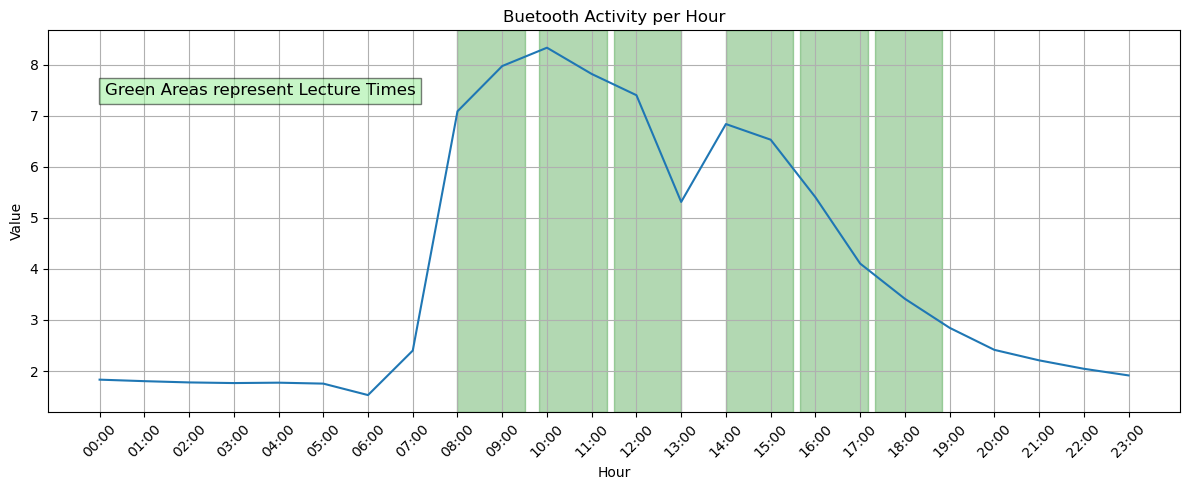

In [161]:
df_resampled_hour_ble = resample(df, 'date_time', 'BLE', 'h', only_freq=True)

lecture_times = [
    {'start': 8.0, 'end': 9.5},
    {'start': 9.833, 'end': 11.333},
    {'start': 11.5, 'end': 13.0},
    {'start': 14.0, 'end': 15.5},
    {'start': 15.666, 'end': 17.166},
    {'start': 17.333, 'end': 18.833}
]

def hour_to_time(hour):
    return f'{hour:02}:00'

plt.figure(figsize=(12, 5))
sns.lineplot(df_resampled_hour_ble, x='date_time', y='BLE')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title("Buetooth Activity per Hour")
plt.grid(True)

plt.xticks(ticks=df_resampled_hour_ble['date_time'], labels=df_resampled_hour_ble['date_time'].apply(hour_to_time), rotation=45)
for lecture_time in lecture_times:
    plt.axvspan(lecture_time['start'], lecture_time['end'], color='green', alpha=0.3)

plt.text(0.05, 0.83, 'Green Areas represent Lecture Times', transform=plt.gca().transAxes, ha='left', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.tight_layout()
plt.show()